In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/scratch3/zha439/REPA


In [16]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [14]:
base_path = "evals_2"

exps = [
    "sit-xl-linear-dinov2-b-enc8-50k",
    "sit-xl-linear-dinov2-b-enc8-patch2patch-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-sample2sample-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-patch2patch-only-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-sample2sample-only-coeff0.2-50k",
]

attr = "FID"

exps_steps = {}
for f in sorted(os.listdir(base_path)):
    if not f.endswith(".csv"):
        continue
    csv_path = os.path.join(base_path, f)
    for exp in exps:
        if f.startswith(exp):
            steps = f.split("_")[1].split(".")[0]
            df = pd.read_csv(csv_path)
            if exp not in exps_steps:
                exps_steps[exp] = {}
            exps_steps[exp][steps] = df[attr].values.item()
            break
    else:
        raise ValueError(f"Unknown experiment {f}")

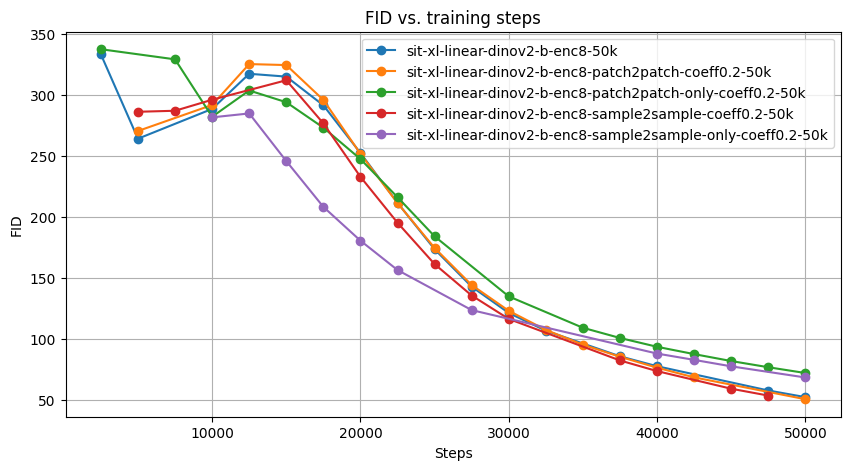

In [30]:
plt.figure(figsize=(10, 5))
for exp, inner_dict in exps_steps.items():
    plt.plot([int(elem) for elem in inner_dict.keys()], inner_dict.values(), marker="o", label=exp)
plt.xlabel("Steps")
plt.ylabel(attr)
plt.title(f"{attr} vs. training steps")
plt.grid()
plt.legend()
plt.show()